In [2]:
import pandas as pd
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('spotify-2023.csv', encoding='latin-1')
data.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [4]:
data.shape

(953, 24)

In [5]:
data.isnull().value_counts()

track_name  artist(s)_name  artist_count  released_year  released_month  released_day  in_spotify_playlists  in_spotify_charts  streams  in_apple_playlists  in_apple_charts  in_deezer_playlists  in_deezer_charts  in_shazam_charts  bpm    key    mode   danceability_%  valence_%  energy_%  acousticness_%  instrumentalness_%  liveness_%  speechiness_%
False       False           False         False          False           False         False                 False              False    False               False            False                False             False             False  False  False  False           False      False     False           False               False       False            817
                                                                                                                                                                                                                                              True   False  False           False      False     Fa

In [6]:
data.streams.replace(to_replace='BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3',
                      value=np.nan, inplace=True)
data['streams']=data.streams.astype('float')

In [7]:
common_key = str(data['key'].mode())
data['key'].replace(to_replace=np.nan, value=common_key, inplace=True)

In [8]:
data['in_shazam_charts'].replace(np.nan, 0, inplace=True)

In [9]:
data.dtypes

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists      object
in_deezer_charts          int64
in_shazam_charts         object
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

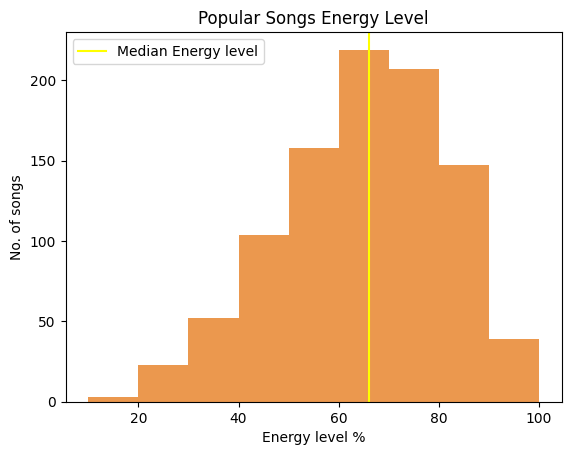

In [16]:
energy_x = data['energy_%']
median_energy = data['energy_%'].median()
bins = [10,20,30,40,50,60,70,80,90,100]
plt.hist(energy_x, bins=bins, color='#EB984E')
plt.axvline(median_energy, color='yellow', label= 'Median Energy level')
plt.xlabel('Energy level %')
plt.ylabel('No. of songs')
plt.title('Popular Songs Energy Level')
plt.legend()

In [11]:
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6


Text(0.5, 0, 'Number of Songs On Trending list')

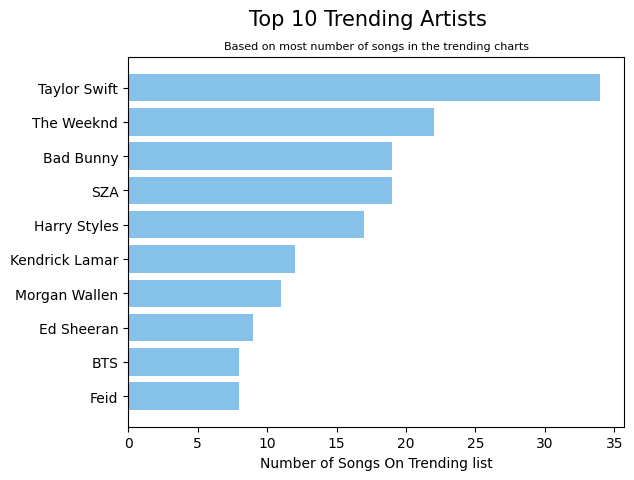

In [48]:
artist_list = data['artist(s)_name']
artist_counter = Counter()
for artist in artist_list:
    artist_counter.update([artist])

artist_counter
artist = []
songs = []
for item in artist_counter.most_common(10):
    artist.append(item[0])
    songs.append(item[1])

artist.reverse()
songs.reverse()

plt.barh(artist, songs, color='#85C1E9')
plt.suptitle('Top 10 Trending Artists', fontsize =15)
plt.title('Based on most number of songs in the Trending charts', fontsize=8)
plt.xlabel('Number of Songs On Trending list')


In [13]:
filt = data['streams'] == data['streams'].max()
data.loc[filt]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,...,171,C#,Major,50,38,80,0,0,9,7


Text(0.5, 1.0, 'Song Breakdown on various attributes')

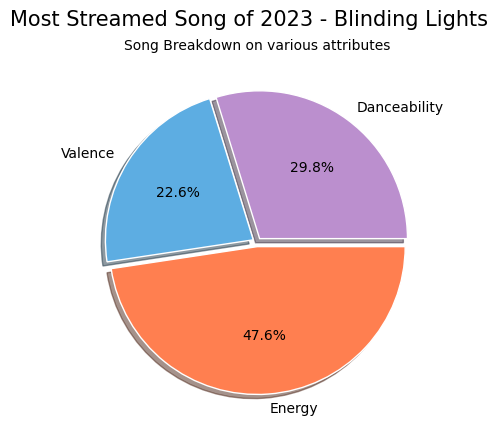

In [23]:
slices = [50, 38, 80]
labels = ['Danceability', 'Valence', 'Energy']
colors = ['#BB8FCE','#5DADE2','#FF7F50']
explode = [0.03,0.03,0.03]
plt.pie(slices, labels=labels, colors=colors, shadow=True, explode=explode,
        autopct='%1.1f%%', wedgeprops={'edgecolor':'white'})
plt.suptitle('Most Streamed Song of 2023 - Blinding Lights', fontsize=15)
plt.title('Song Breakdown on various attributes', fontsize=10)

In [71]:
most_streamed_artists = data.groupby('artist(s)_name').streams.agg([sum])
most_streamed_artists = most_streamed_artists.sort_values('sum',ascending=False).head(10)
most_streamed_artists.reset_index(inplace=True)

C:\Users\ragha\AppData\Local\Temp\ipykernel_20056\3100291082.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  most_streamed_artists = data.groupby('artist(s)_name').streams.agg([sum])


<BarContainer object of 10 artists>

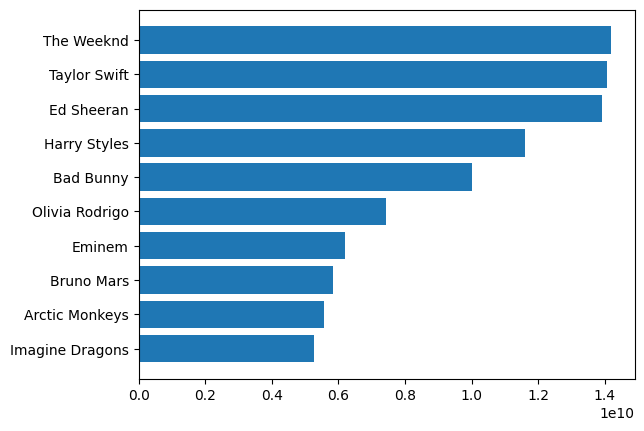

In [79]:
y_artist = list(most_streamed_artists['artist(s)_name'])
x_streams = list(most_streamed_artists['sum'])
x_streams.reverse()
y_artist.reverse()
plt.barh(y_artist, x_streams)